In [1]:
# KNN - on titanic data
# tuning

import time
import random
from math import *
import operator
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1)

# import the ML algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from statsmodels.tools.eval_measures import rmse

# pre-processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing.data import QuantileTransformer

# import libraries for model validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics


In [25]:
location = r"E:\\MYLEARN\\2-ANALYTICS-DataScience\\datasets\\titanic-train.csv"

In [26]:
# load the training data from breast cancer data set
df_titanic = pd.read_csv(location)
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
df_titanic.shape

(891, 12)

In [28]:
# Check the available styles
# plt.style.available

In [29]:
plt.style.use('seaborn')

In [30]:
#Checking for missing data

NAs = pd.concat([df_titanic.isnull().sum()], axis=1, keys=['Train'])

NAs[NAs.sum(axis=1) > 0]

,Train
Age,177
Cabin,687
Embarked,2


In [31]:
# let us understand what was achieved in the above step

In [32]:
# Concatenation
df1 = pd.DataFrame([['a', 1], ['b', 2]],
                   columns=['letter', 'number'])
df1

,letter,number
0,a,1
1,b,2


In [33]:
df2 = pd.DataFrame([['c', 3], ['d', 4]],
                   columns=['letter', 'number'])
df2

,letter,number
0,c,3
1,d,4


In [34]:
# Combine DataFrame objects with overlapping columns and return everything. 
pd.concat([df1, df2])

,letter,number
0,a,1
1,b,2
0,c,3
1,d,4


In [35]:
# Columns outside the intersection will be filled with NaN values.
df3 = pd.DataFrame([['c', 3, 'cat'], ['d', 4, 'dog']],
                    columns=['letter', 'number', 'animal'])
df3

,letter,number,animal
0,c,3,cat
1,d,4,dog


In [36]:
pd.concat([df1, df3])

,animal,letter,number
0,NaN,a,1
1,NaN,b,2
0,cat,c,3
1,dog,d,4


In [37]:
# Combine DataFrame objects with overlapping columns and return only 
# those that are shared by passing inner to the join keyword argument
pd.concat([df1, df3], join="inner")

,letter,number
0,a,1
1,b,2
0,c,3
1,d,4


In [38]:
# Combine DataFrame objects horizontally along the x axis by passing 
# in axis=1.

df4 = pd.DataFrame([['bird', 'polly'], ['monkey', 'george']],
                  columns=['animal', 'name'])

In [39]:
pd.concat([df1, df4], axis=1)

,letter,number,animal,name
0,a,1,bird,polly
1,b,2,monkey,george


In [40]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [41]:
pd.concat([df_titanic.isnull().sum()], axis=1)

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [42]:
# method 2
NAN1 = pd.DataFrame(df_titanic.isnull().sum(), columns=['Train'])
NAN1

,Train
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [43]:
NAN1[NAN1['Train'] > 0]

,Train
Age,177
Cabin,687
Embarked,2


In [44]:
# we will drop the Cabin feature since it is missing a lot of the data

# pop is inplace, drop is not isplace

df_titanic.pop('Cabin')
df_titanic.pop('Name')
df_titanic.pop('Ticket')

# df_titanic.drop(['Cabin', 'Name', 'Ticket'], axis=1)

df_titanic.shape

(891, 9)

In [45]:
# # Filling missing Age values with mean
df_titanic['Age'] = df_titanic['Age'].fillna(df_titanic['Age'].mean())

In [46]:
# # Filling missing Embarked values with most common value
df_titanic['Embarked'] = df_titanic['Embarked'].fillna(df_titanic['Embarked'].mode()[0])

In [47]:
# ‘Pclass’ is a categorical feature so we convert its values to strings

In [48]:
df_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [49]:
df_titanic['Pclass'] = df_titanic['Pclass'].apply(str)

In [50]:
# # Getting Dummies from all other categorical vars
for col in df_titanic.dtypes[df_titanic.dtypes == 'object'].index:
    for_dummy = df_titanic.pop(col)
    df_titanic = pd.concat([df_titanic, pd.get_dummies(for_dummy, prefix=col)], axis=1)

In [51]:
# Index values of type object
df_titanic.dtypes[df_titanic.dtypes == 'object'].index

Index([], dtype='object')

In [52]:
df_titanic.shape

(891, 14)

In [53]:
# retrieve the response feature
labels = df_titanic.pop('Survived')

In [54]:
type(labels)

pandas.core.series.Series

In [55]:
# For testing, we choose to split our data to 75% train and 25% for test

In [56]:
x_train, x_test, y_train, y_test = train_test_split(df_titanic, 
                                                    labels, 
                                                    test_size=0.25,
                                                    random_state=4)

In [57]:
# instantiate the KNN classifier
model = KNeighborsClassifier()

In [58]:
# fit the classifier with training data
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [59]:
# Predict for all the test instances
y_pred = model.predict(x_test)

In [60]:
# Creates a confusion matrix
cm = confusion_matrix(y_test, y_pred) 

In [61]:
cm

array([[125,  25],
       [ 45,  28]], dtype=int64)

In [62]:
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index =   ['Survived-Y-0','Survived-N-1'], 
                     columns = ['Survived-Y-0','Survived-N-1'])

In [63]:
cm_df.dtypes

Survived-Y-0    int64
Survived-N-1    int64
dtype: object

In [64]:
plt.style.use('ggplot')

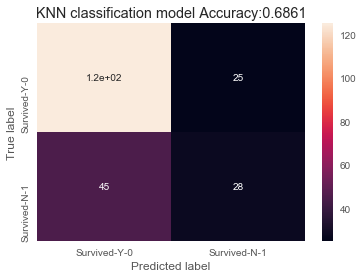

In [65]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True)
plt.title('KNN classification model Accuracy:{0:.4f}'.format(accuracy_score(y_test, y_pred)))

plt.ylabel('True label')
plt.xlabel('Predicted label');